In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import copy

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

**Load the Dataset**

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Perform EDA**

In [3]:
# shape of the dataset
insurance_df.shape

(1338, 7)

In [4]:
# data types of each column
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**Observation:**
- From the above results we can say there are no missing values

In [5]:
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observation:**
- Data looks legit as all the statistics seem reasonable .
- Looking at the age column, data looks like that most of the age consists of age population .
- Very few population have more than 2 children. 75% of the people have 2 or less children .
- The claimed amount is higly skewed as most people would require basic medi-care .

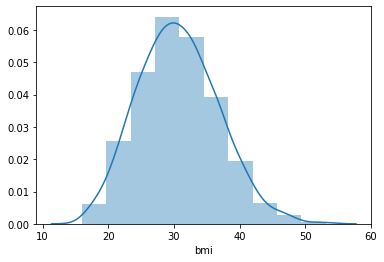

In [6]:
# distribution of bmi
sns.distplot(insurance_df['bmi'], bins=10)

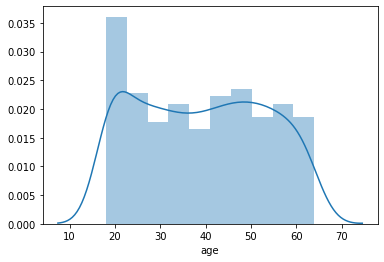

In [7]:
# distribution of age
sns.distplot(insurance_df['age'], bins=10)

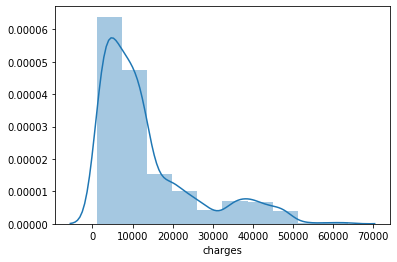

In [8]:
# distribution of charges
sns.distplot(insurance_df['charges'], bins=10)

In [9]:
# skewness of bmi
stats.stats.skew(insurance_df['bmi'])

0.28372857291709386

BMI column is not highly skewed

In [10]:
# skewness of age
stats.stats.skew(insurance_df['age'])

0.055610083072599126

Age column is not highly skewed

In [11]:
# skewness of charges
stats.stats.skew(insurance_df['charges'])

1.5141797118745743

Charges column is highly skewed

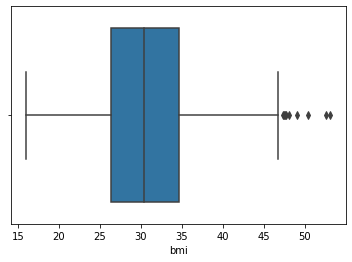

In [12]:
# checking presence of outliers in bmi
sns.boxplot(x=insurance_df['bmi'])

BMI column has sevaral outliers

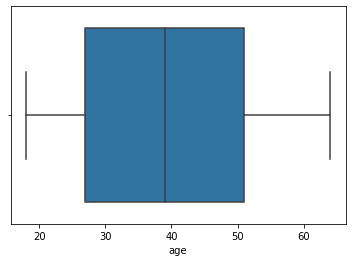

In [13]:
# checking presence of outliers in age
sns.boxplot(x=insurance_df['age'])

Age column has no outliers

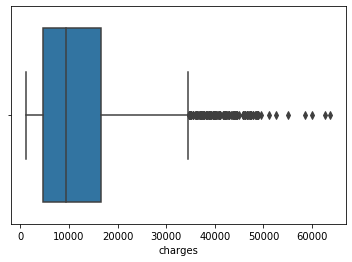

In [14]:
# checking presence of outliers in charges
sns.boxplot(x=insurance_df['charges'])

Charges column has sevaral outliers

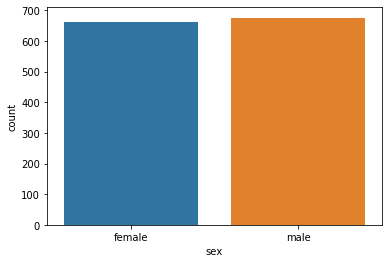

In [15]:
# distribution of sex
sns.countplot(insurance_df['sex'])

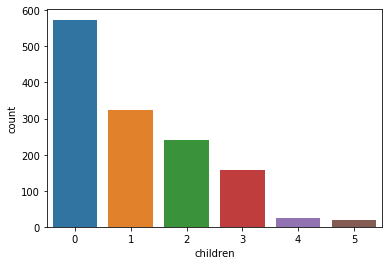

In [16]:
# distribution of children
sns.countplot(insurance_df['children'])

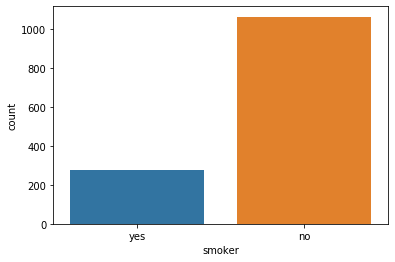

In [17]:
# distribution of smoker
sns.countplot(insurance_df['smoker'])

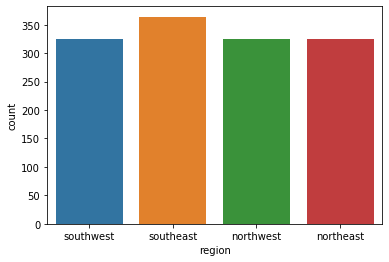

In [18]:
# distribution of region
sns.countplot(insurance_df['region'])

In [19]:
le = LabelEncoder()
encoded_insurance_df = insurance_df.copy()
encoded_insurance_df['sex'] = le.fit_transform(encoded_insurance_df['sex'])
encoded_insurance_df['smoker'] = le.fit_transform(encoded_insurance_df['smoker'])
encoded_insurance_df['region'] = le.fit_transform(encoded_insurance_df['region'])
encoded_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


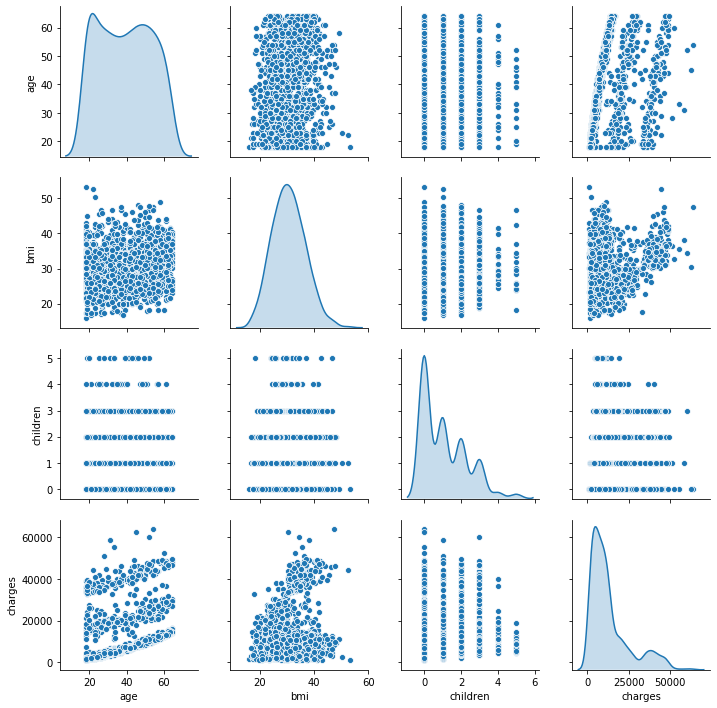

In [20]:
sns.pairplot(insurance_df, diag_kind='kde')

**Do charges of people who smoke differ significantly from the people who don't?**

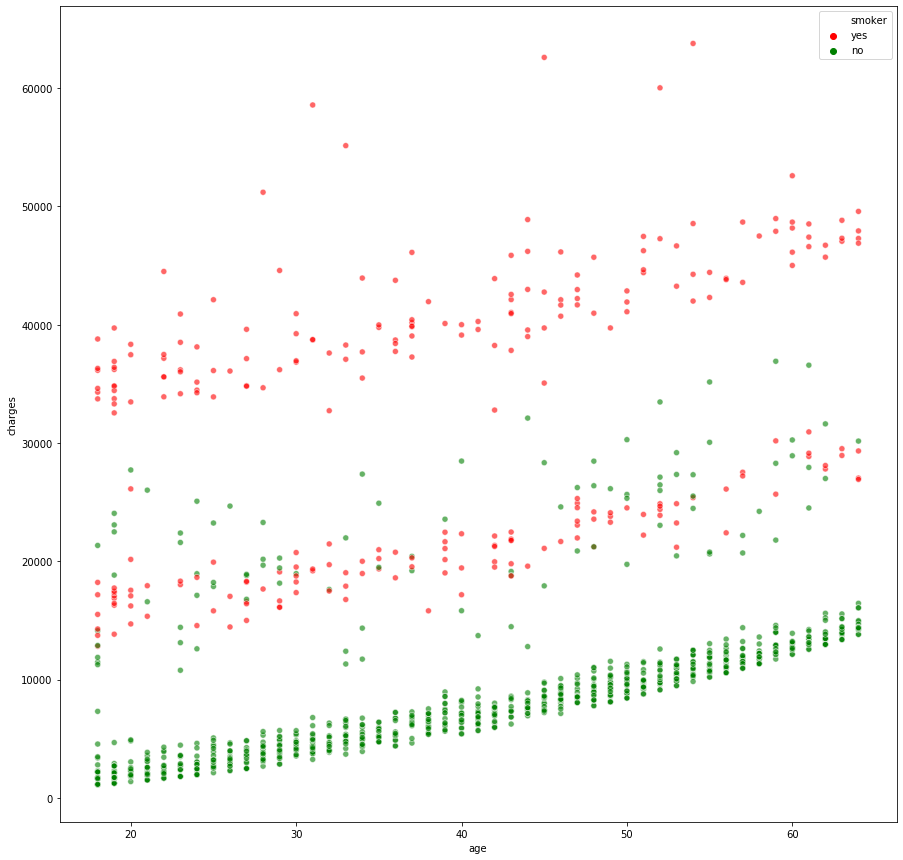

In [21]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=insurance_df['age'], y=insurance_df['charges'], hue=insurance_df['smoker'], palette= ['red','green'] ,alpha=0.6)
plt.show()

**Observation:**
- From the graph, we find that the charges are more for smokers than most of the non-smokers

**Does bmi of males differ significantly from that of females?**

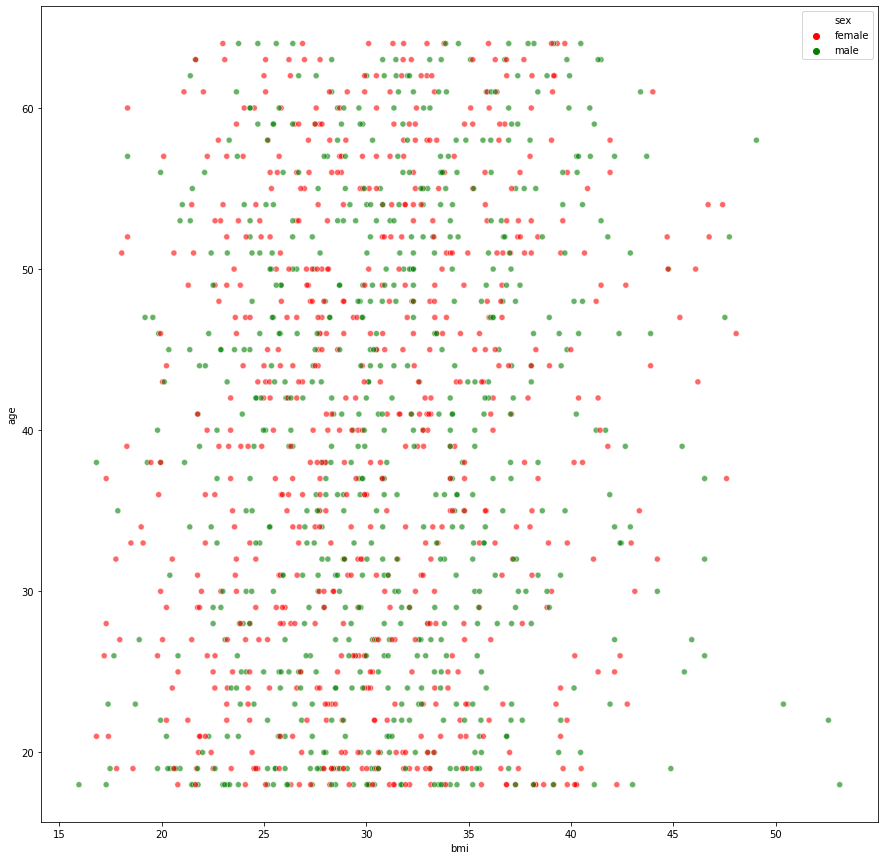

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=insurance_df['bmi'], y=insurance_df['age'], hue=insurance_df['sex'], palette= ['red','green'] ,alpha=0.6)
plt.show()

**Observation:**
- It is difficult to specify the bmi of males differ significantly from that of females.

In [23]:
# T-test to check dependency of bmi on gender
x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print("p-value: " + str(p_value))

if p_value < 0.05:  # Setting our significance level at 5%
    print('Gender has effect as the p_value is lesser than 0.05')
else:
    print('Gender has no effect as the p_value is greater than 0.05')

p-value: 0.08997637178984932
Gender has no effect as the p_value is greater than 0.05


**Is the proportion of smokers significantly different in different genders?**

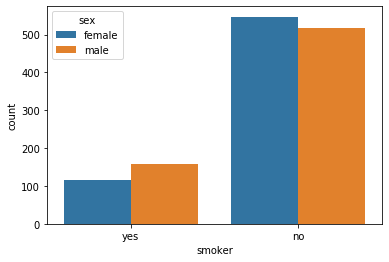

In [24]:
sns.countplot(x=insurance_df['smoker'], hue=insurance_df['sex'])

**Observation:**
- From the graph above we can say to some extent that gender has an effect on smoking habits.

In [25]:
# Chi_square test to check if smoking habits are different for different genders
crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print("p-value: " + str(p_value))

if p_value < 0.05:  # Setting our significance level at 5%
    print('Gender has an effect on smoking habit as p-value is lesser than 0.05')
else:
    print('Gender has no effect on smoking habit as p-value is greater than 0.05')

p-value: 0.006548143503580696
Gender has an effect on smoking habit as p-value is lesser than 0.05


**Is the distribution of bmi across women with no children, one child and two children, the same ?**

In [26]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)

print("p-value: " + str(p_value))

if p_value < 0.05:  # Setting our significance level at 5%
    print('No. of children has no effect on bmi as the p_value is lesser than 0.05')
else:
    print('No. of children has an effect on bmi as the p_value is grester than 0.05')

p-value: 0.7158579926754841
No. of children has an effect on bmi as the p_value is grester than 0.05
